In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras import backend

In [2]:
X=np.array([[0,0],[0,1],[1,0],[1,1]],"float32")
y=np.array([[0],[1],[1],[0]],"float32")

In [3]:
model = Sequential()
input_shape = X.shape[1]
model.add(Dense(1,activation = 'sigmoid',
               input_dim = input_shape))
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [4]:
result = model.fit(X,y,epochs=500, verbose = 0)

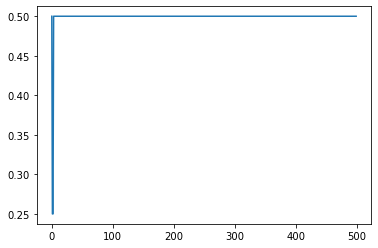

In [5]:
plt.plot(result.history["accuracy"])

In [6]:
backend.clear_session()

In [7]:
model = Sequential()
input_shape = X.shape[1]
model.add(Dense(16,activation = 'relu',
               input_dim = input_shape))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [8]:
result = model.fit(X,y,epochs=10000, verbose = 0)

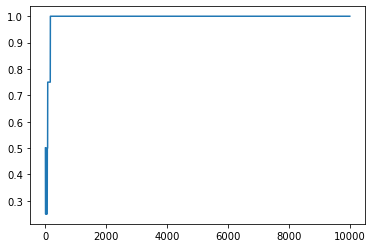

In [9]:
plt.plot(result.history["accuracy"])

In [10]:
from keras.datasets import mnist

In [11]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Text(0.5, 1.0, 'Label:7')

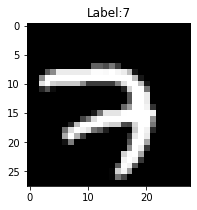

In [14]:
plt.figure(figsize=(5,3))
plt.imshow(X_train[5000],'gray')
plt.title("Label:{}".format(y_train[5000]))

In [15]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [16]:
X_train/= 255
X_test /= 255

In [17]:
X_train.shape

(60000, 784)

## one hot encoding



In [18]:
from keras.utils import np_utils
n_classes = 10

In [19]:
from keras.utils import np_utils
n_classes = 10
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("shape after one-hot encoding: ",Y_train.shape)

shape after one-hot encoding:  (60000, 10)


In [20]:
print("shape after one-hot encoding: ",Y_test.shape)

shape after one-hot encoding:  (10000, 10)


In [21]:
model = Sequential()
input_shape = X_train.shape[1]
model.add(Dense(100,input_dim=input_shape,activation = 'relu')) ##784->100
model.add(Dense(10,activation = 'softmax')) ## 100 -->10

In [22]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ["accuracy"])

In [23]:
result = model.fit(X_train,Y_train,
                  batch_size = 100, epochs = 100,##mini_batch사용
                  verbose=0,
                  validation_data=(X_test,Y_test)) ##정확도 중간중간 체크용도

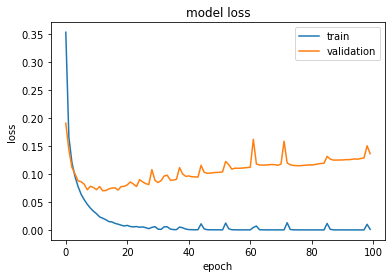

In [24]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc ='upper right')


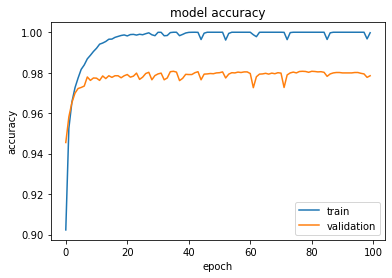

In [25]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc ='lower right')


## in-Class Practice

1) Load load_breast cancer data from sklearn

2) Save the data into X and y, and scale it with standard scaler

Refer the previous lecture

3) split the data into training (70%) and validation (30%)

3) Use multilayer perceptron algorithm

- Use an input layer, an output layer, and three hidden layers
- you can define the number of nodes (12-6-3) in the hidden layer
- Optimizer = adagrid. loss = binary_crossentropy
- Use Relu function for the first three layer, and use sigmoid function for the last layer.
- batch size = 100, epoch number = 100

4) plot training and validation loss

5) plot training and validation accuracies




In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [27]:
model = Sequential()
input_shape = X.shape[1]
model.add(Dense(16,activation = 'relu',input_dim = input_shape))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(6,activation = 'relu'))
model.add(Dense(3,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adagrad',
             loss = 'binary_crossentropy',
             metrics = ["accuracy"])


result = model.fit(X_train,y_train,
                  batch_size = 100, epochs = 100,
                  verbose=0,
                  validation_data=(X_val,y_val))


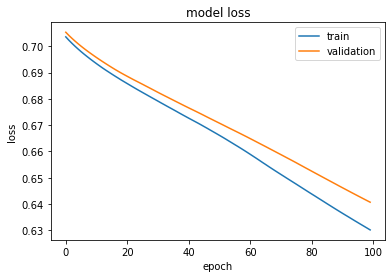

In [28]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc ='upper right')


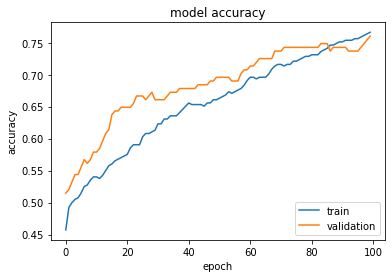

In [29]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc ='lower right')